In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
import pandas as pd
df = pd.read_csv(r"D:\New folder\archive (2)\city_day.csv")

In [3]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [5]:
cols = df.columns
cols

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [6]:
cols_to_fill = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene','AQI']

In [7]:
for col in cols_to_fill:
    df[col] = df[col].fillna(df[col].median())

In [8]:
df['AQI_Bucket'].unique()

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [9]:
df['Air_Quality'] = df['AQI_Bucket'].fillna('Moderate')
df.drop('AQI_Bucket',axis=1,inplace =True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         29531 non-null  object 
 1   Date         29531 non-null  object 
 2   PM2.5        29531 non-null  float64
 3   PM10         29531 non-null  float64
 4   NO           29531 non-null  float64
 5   NO2          29531 non-null  float64
 6   NOx          29531 non-null  float64
 7   NH3          29531 non-null  float64
 8   CO           29531 non-null  float64
 9   SO2          29531 non-null  float64
 10  O3           29531 non-null  float64
 11  Benzene      29531 non-null  float64
 12  Toluene      29531 non-null  float64
 13  Xylene       29531 non-null  float64
 14  AQI          29531 non-null  float64
 15  Air_Quality  29531 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [11]:
city_wise_AQI = df[['City','AQI']].groupby(['City']).median().sort_values(['AQI']).reset_index()

In [12]:
city_wise_AQI.head()

,City,AQI
0,Aizawl,24.0
1,Thiruvananthapuram,69.0
2,Shillong,69.5
3,Coimbatore,77.5
4,Chandigarh,83.0


In [23]:
pip install seaborn

     ------------------------------------ 285.1/285.1 kB 127.5 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

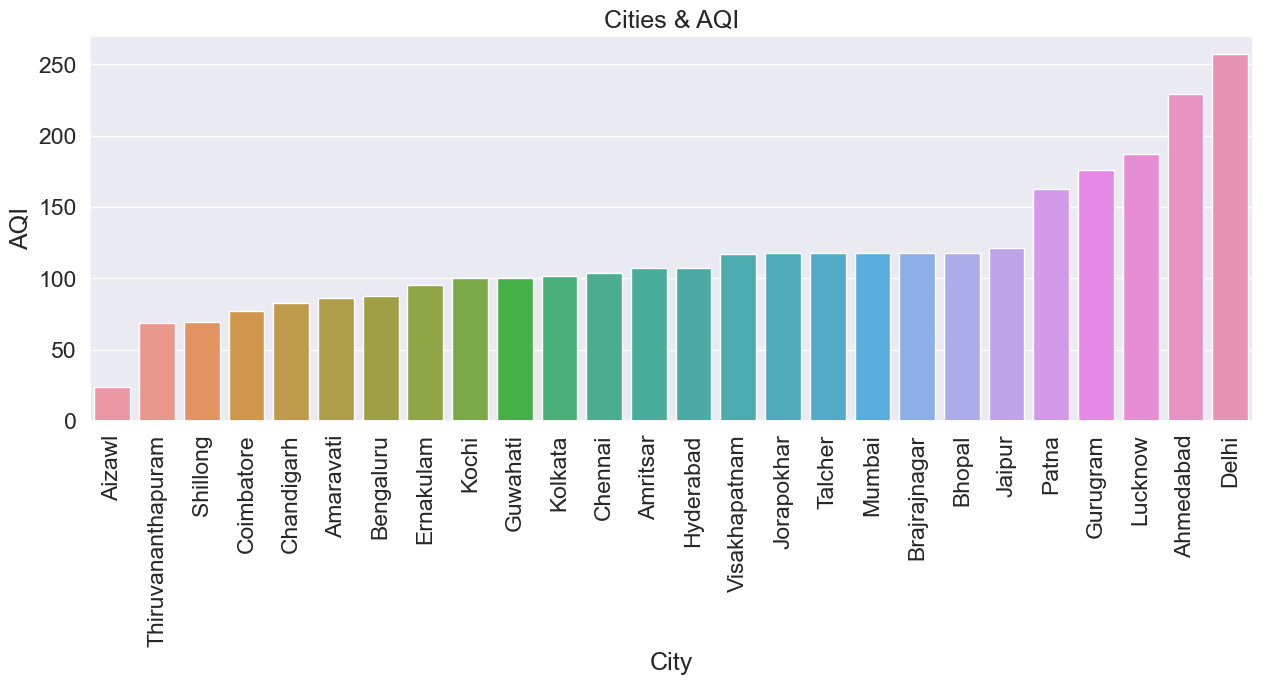

In [15]:
plt.figure(figsize=(15,5))
sns.set(font_scale=1.5)
sns.barplot(x='City', y='AQI', data=city_wise_AQI).set(title ='Cities & AQI')
plt.xticks(rotation=90)
plt.show()

In [16]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] =df['Date'].dt.month
df.drop('Date',axis=1,inplace=True)

In [17]:
df['year'].unique()

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

In [18]:
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_Quality,year,month
0,Ahmedabad,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,Moderate,2015,1
1,Ahmedabad,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,Moderate,2015,1
2,Ahmedabad,48.57,95.68,17.40,19.30,29.70,15.85,17.40,29.07,30.70,6.80,16.40,2.25,118.0,Moderate,2015,1
3,Ahmedabad,48.57,95.68,1.70,18.48,17.97,15.85,1.70,18.59,36.08,4.43,10.14,1.00,118.0,Moderate,2015,1
4,Ahmedabad,48.57,95.68,22.10,21.42,37.76,15.85,22.10,39.33,39.31,7.01,18.89,2.78,118.0,Moderate,2015,1


In [19]:
x1 = df[['City','AQI','year']].groupby(['City','year']).median().sort_values(['AQI']).reset_index()

In [20]:
x1.head()

,City,year,AQI
0,Aizawl,2020,24.0
1,Amaravati,2020,54.0
2,Thiruvananthapuram,2020,64.0
3,Shillong,2020,65.0
4,Thiruvananthapuram,2017,68.0


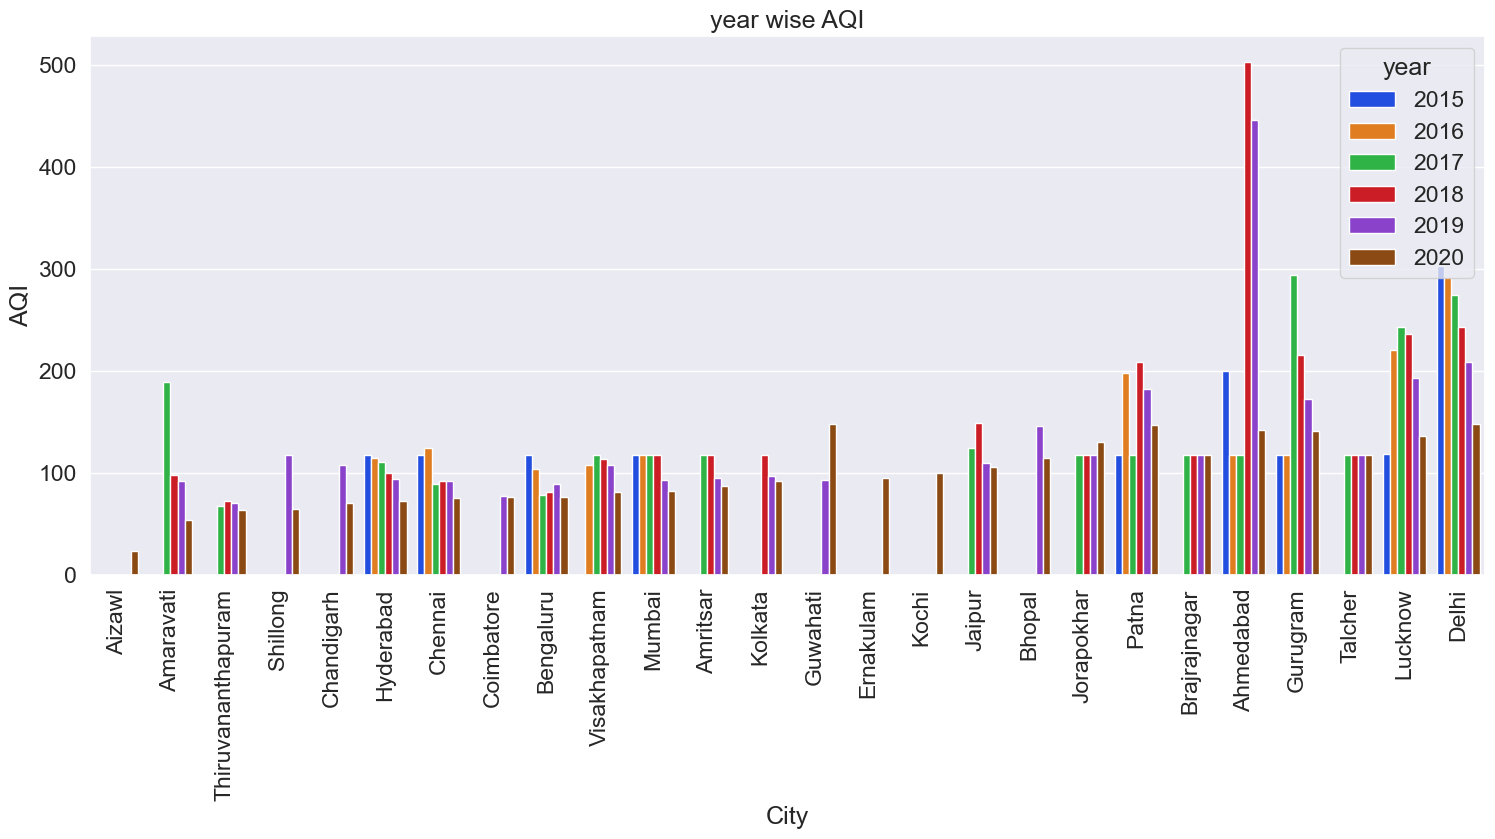

In [21]:
plt.figure(figsize=(18,7))
sns.set(font_scale=1.5)
sns.barplot(x='City', y='AQI', data=x1,hue='year',palette='bright').set(title ='year wise AQI')
plt.xticks(rotation=90)
plt.show()

In [22]:
df.head(2)

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_Quality,year,month
0,Ahmedabad,48.57,95.68,0.92,18.22,17.15,15.85,0.92,27.64,133.36,0.00,0.02,0.00,118.0,Moderate,2015,1
1,Ahmedabad,48.57,95.68,0.97,15.69,16.46,15.85,0.97,24.55,34.06,3.68,5.50,3.77,118.0,Moderate,2015,1


In [23]:
month_wise = df.groupby(['City','month']).agg(
    #month = pd.NamedAgg(column='month',aggfunc = max),
    AQI = pd.NamedAgg(column = 'AQI',aggfunc = np.mean))
month_wise.reset_index(inplace = True)

In [24]:
month_wise.head()

,City,month,AQI
0,Ahmedabad,1,346.172043
1,Ahmedabad,2,447.894118
2,Ahmedabad,3,380.129032
3,Ahmedabad,4,295.305556
4,Ahmedabad,5,216.392473


In [25]:
df[df['City']=='Ahmedabad'].sort_values('AQI',ascending=False).head()[['City','AQI']]

,City,AQI
1145,Ahmedabad,2049.0
1136,Ahmedabad,1917.0
560,Ahmedabad,1842.0
1048,Ahmedabad,1747.0
1463,Ahmedabad,1719.0


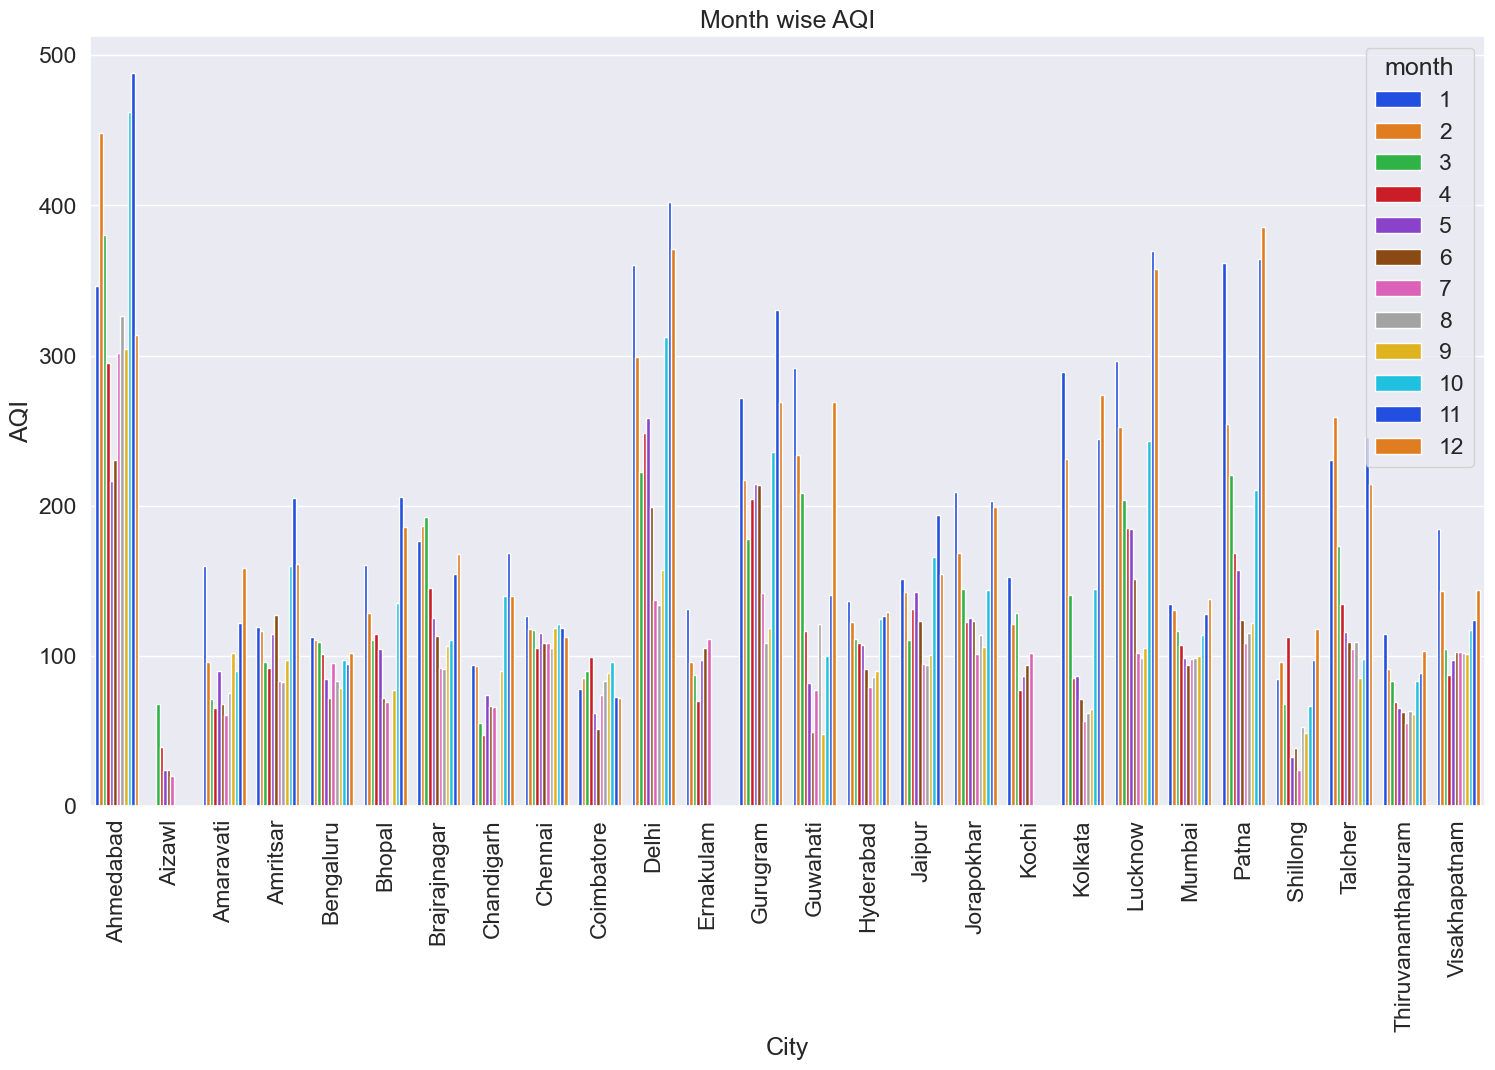

In [26]:
plt.figure(figsize=(18,10))
sns.set(font_scale=1.5)
sns.barplot(x='City', y='AQI', data=month_wise,hue='month',palette = 'bright').set(title ='Month wise AQI')
plt.xticks(rotation=90)
plt.show()

In [27]:
df1 = pd.read_csv(r"D:\New folder\archive (3)\India Cities LatLng.csv")

In [28]:
df1.head()

,city,lat,lng,country,iso2,admin_name,capital,population,population_proper
0,Delhi,28.6600,77.2300,India,IN,Delhi,admin,29617000.0,16753235.0
1,Mumbai,18.9667,72.8333,India,IN,Mahārāshtra,admin,23355000.0,12478447.0
2,Kolkāta,22.5411,88.3378,India,IN,West Bengal,admin,17560000.0,4496694.0
3,Bangalore,12.9699,77.5980,India,IN,Karnātaka,admin,13707000.0,8443675.0
4,Chennai,13.0825,80.2750,India,IN,Tamil Nādu,admin,11324000.0,6727000.0


In [29]:
df_new = pd.merge(df, df1, how = 'left', left_on = 'City',right_on = 'city')

In [30]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29531 entries, 0 to 29530
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               29531 non-null  object 
 1   PM2.5              29531 non-null  float64
 2   PM10               29531 non-null  float64
 3   NO                 29531 non-null  float64
 4   NO2                29531 non-null  float64
 5   NOx                29531 non-null  float64
 6   NH3                29531 non-null  float64
 7   CO                 29531 non-null  float64
 8   SO2                29531 non-null  float64
 9   O3                 29531 non-null  float64
 10  Benzene            29531 non-null  float64
 11  Toluene            29531 non-null  float64
 12  Xylene             29531 non-null  float64
 13  AQI                29531 non-null  float64
 14  Air_Quality        29531 non-null  object 
 15  year               29531 non-null  int64  
 16  month              295

In [31]:
C1 = df_new['City'].unique()
C2 = df_new['city'].unique()

In [32]:
missing = []
for i in C1:
    if i not in C2:
        missing.append(i)

In [33]:
missing

['Ahmedabad',
 'Aizawl',
 'Amaravati',
 'Bhopal',
 'Brajrajnagar',
 'Chandigarh',
 'Ernakulam',
 'Gurugram',
 'Guwahati',
 'Hyderabad',
 'Jorapokhar',
 'Kolkata',
 'Talcher']

In [34]:
geo_data = df_new.groupby('City').agg(
air_quality = pd.NamedAgg('Air_Quality',pd.Series.mode),
aqi = pd.NamedAgg('AQI',np.mean),
lat = pd.NamedAgg('lat',max),
lng = pd.NamedAgg('lng',max)
).reset_index()

In [35]:
geo_data.head()

,City,air_quality,aqi,lat,lng
0,Ahmedabad,Moderate,339.861623,NaN,NaN
1,Aizawl,Good,36.238938,NaN,NaN
2,Amaravati,Satisfactory,97.925342,NaN,NaN
3,Amritsar,Moderate,119.771499,31.6167,74.8500
4,Bengaluru,Satisfactory,95.485316,12.9716,77.5946


<AxesSubplot: xlabel='lng', ylabel='lat'>

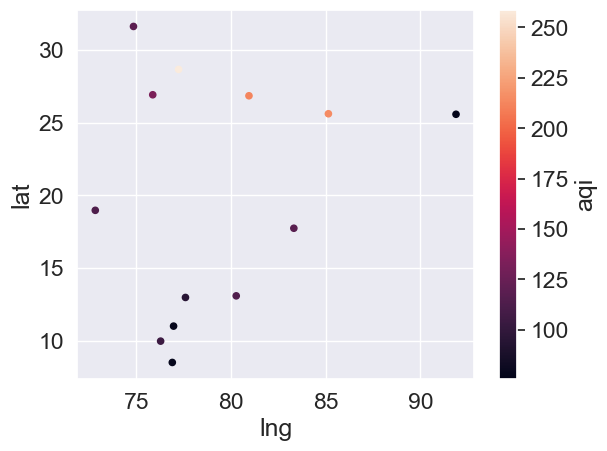

In [36]:
geo_data.plot(x='lng',y='lat',kind = 'scatter',c='aqi',colormap = 'YlOrRd')

In [37]:

import geopandas as gpd
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [38]:
import geopandas as gpd
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


<AxesSubplot: >

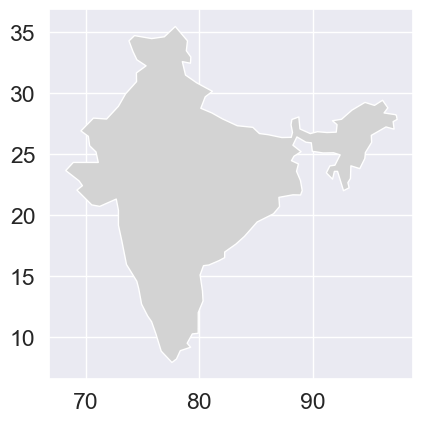

In [39]:
countries[countries['name']=='India'].plot(color='lightgrey')

C:\Users\acer\AppData\Local\Temp\ipykernel_11620\3342095261.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True,alpha=0.5)


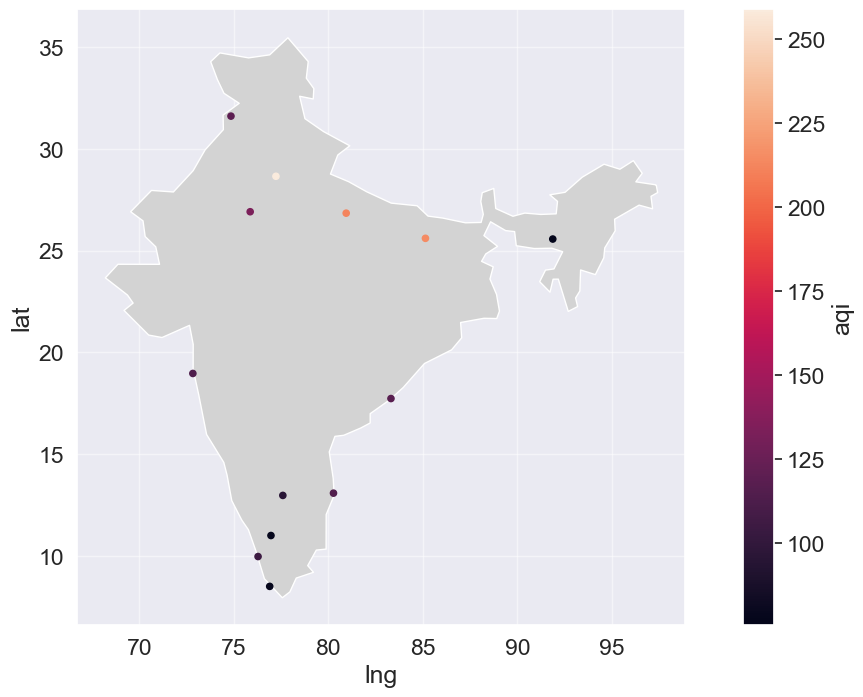

In [40]:
fig,ax = plt.subplots(figsize = (15,8))
countries[countries['name']=='India'].plot(color='lightgrey',ax=ax)
geo_data.plot(x='lng',y='lat',kind = 'scatter',c='aqi',colormap = 'YlOrRd',ax=ax)
ax.grid(b=True,alpha=0.5)
plt.show()

C:\Users\acer\AppData\Local\Temp\ipykernel_11620\2133089517.py:7: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True,alpha=0.5)


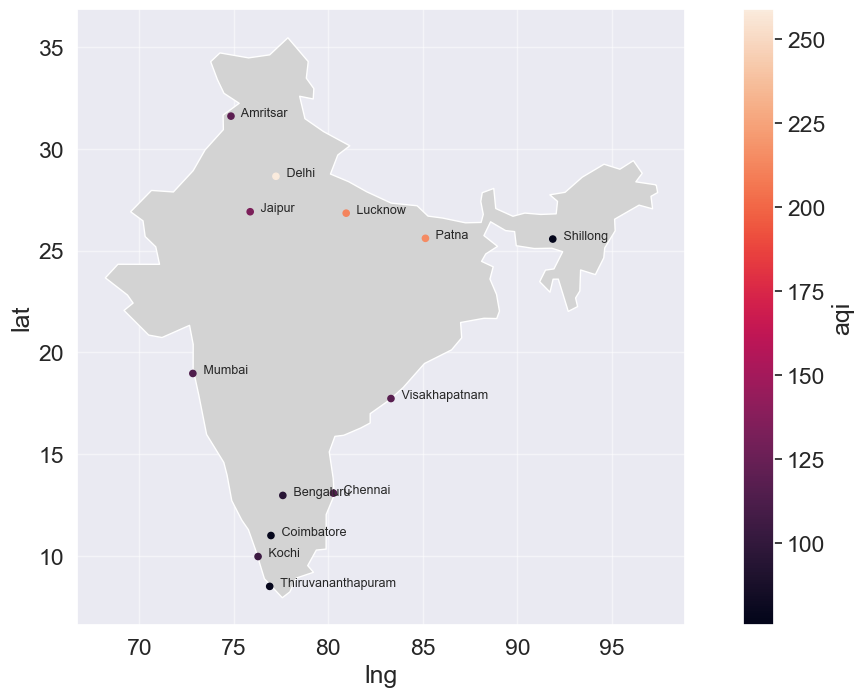

In [41]:
fig,ax = plt.subplots(figsize = (15,8))
countries[countries['name']=='India'].plot(color='lightgrey',ax=ax)
geo_data.plot(x='lng',y='lat',kind = 'scatter',c='aqi',colormap = 'YlOrRd',ax=ax)

for idx, row in geo_data.iterrows():
    ax.annotate(str('   '+row['City']), (row['lng'], row['lat']),size=9 )
ax.grid(b=True,alpha=0.5)
plt.show()

In [44]:
pip install --global http-server

Note: you may need to restart the kernel to use updated packages.


ERROR: You must give at least one requirement to install (see "pip help install")


In [45]:
pip install flask flask-cors

     -------------------------------------- 101.5/101.5 kB 1.5 MB/s eta 0:00:00
     ------------------------------------ 232.7/232.7 kB 121.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
